In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('../DATA/student_data.csv')
df.head()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


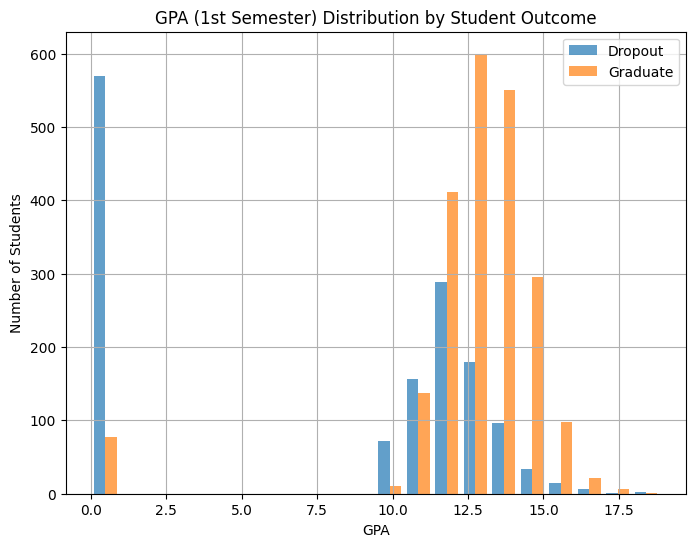

In [14]:
# How does GPA (or academic performance) relate to dropout or graduation?
# → Bar plot / KDE plot / Boxplot

gpa_dropout = df[df["Output"] == "Dropout"]["Curricular units 1st sem (grade)"]
gpa_graduate = df[df["Output"] == "Graduate"]["Curricular units 1st sem (grade)"]

plt.figure(figsize=(8, 6))
plt.hist([gpa_dropout, gpa_graduate], label=["Dropout", "Graduate"], bins=20, alpha=0.7)
plt.title("GPA (1st Semester) Distribution by Student Outcome")
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.legend()
plt.grid(True)
plt.show()

[701, 720, 548, 1661]


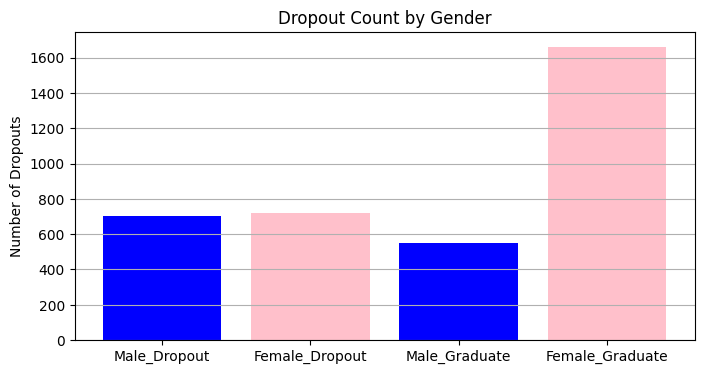

In [21]:
# Does gender affect dropout rates?

dropout_male = df[(df["Output"] == "Dropout") & (df["Gender"] == 1)]
dropout_female = df[(df["Output"] == "Dropout") & (df["Gender"] == 0)]
graduate_male = df[(df["Output"] == "Graduate") & (df["Gender"] == 1)]
graduate_female = df[(df["Output"] == "Graduate") & (df["Gender"] == 0)]

dropout_counts = [len(dropout_male), len(dropout_female),len(graduate_male),len(graduate_female)]
print(dropout_counts)
labels = ['Male_Dropout', 'Female_Dropout', 'Male_Graduate','Female_Graduate']

plt.figure(figsize=(8, 4))
plt.bar(labels, dropout_counts, color=['blue', 'pink'])
plt.title("Dropout Count by Gender")
plt.ylabel("Number of Dropouts")
plt.grid(axis='y')
plt.show()


C:\Users\ADMIN777\AppData\Local\Temp\ipykernel_10188\1667469717.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["Gender"] == 1]["Curricular units 1st sem (grade)"],


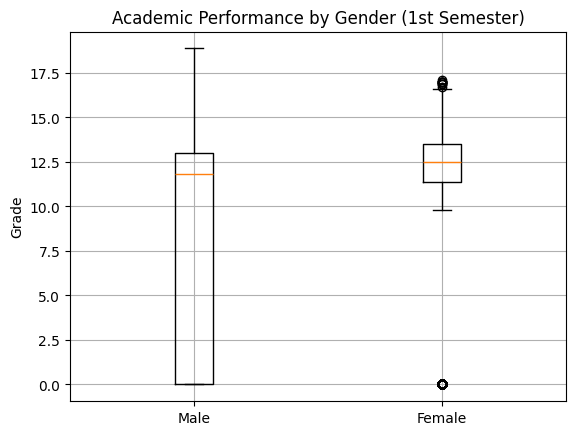

In [22]:
plt.boxplot([df[df["Gender"] == 1]["Curricular units 1st sem (grade)"], 
             df[df["Gender"] == 0]["Curricular units 1st sem (grade)"]], 
            labels=["Male", "Female"])
plt.title("Academic Performance by Gender (1st Semester)")
plt.ylabel("Grade")
plt.grid(True)
plt.show()


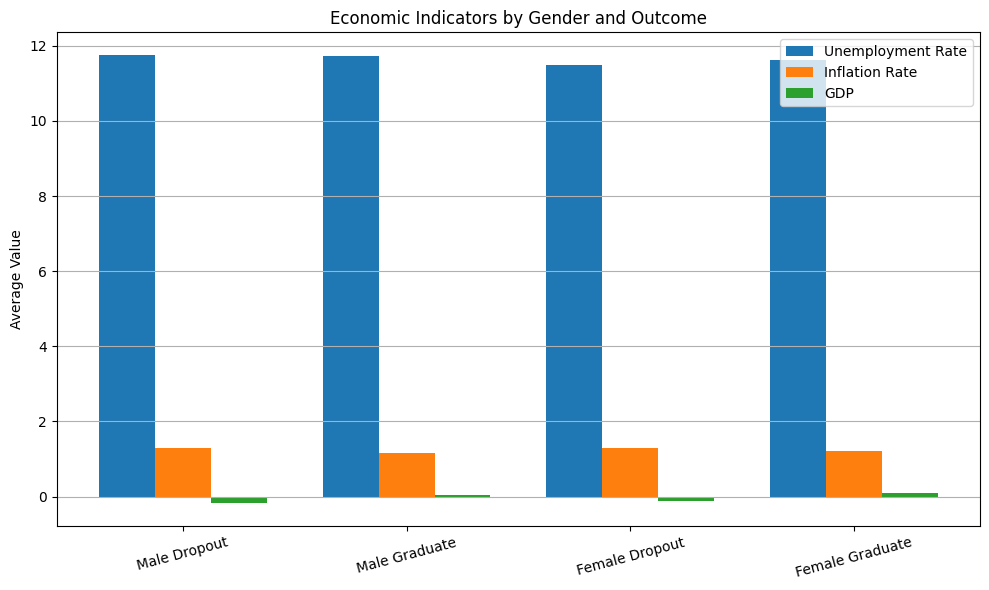

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Split by gender and outcome
male_dropout = df[(df["Gender"] == 1) & (df["Output"] == "Dropout")]
male_graduate = df[(df["Gender"] == 1) & (df["Output"] == "Graduate")]
female_dropout = df[(df["Gender"] == 0) & (df["Output"] == "Dropout")]
female_graduate = df[(df["Gender"] == 0) & (df["Output"] == "Graduate")]

# Calculate mean economic indicators
groups = {
    "Male Dropout": male_dropout,
    "Male Graduate": male_graduate,
    "Female Dropout": female_dropout,
    "Female Graduate": female_graduate
}

unemployment = [group["Unemployment rate"].mean() for group in groups.values()]
inflation = [group["Inflation rate"].mean() for group in groups.values()]
gdp = [group["GDP"].mean() for group in groups.values()]

x = np.arange(len(groups))  # Group positions
width = 0.25

# Plot grouped bars
plt.figure(figsize=(10, 6))
plt.bar(x - width, unemployment, width=width, label="Unemployment Rate")
plt.bar(x, inflation, width=width, label="Inflation Rate")
plt.bar(x + width, gdp, width=width, label="GDP")

plt.xticks(x, groups.keys(), rotation=15)
plt.ylabel("Average Value")
plt.title("Economic Indicators by Gender and Outcome")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
